In [8]:
import numpy as np
import matplotlib.pyplot as plt


#  تعریف توابع انتقال و مشتقات آنها 
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sig = sigmoid(x)
    return sig * (1 - sig)

def pureline(x):
    return x

def pureline_derivative(x):
    return np.ones_like(x)

#  مقادیر اولیه وزن‌ها و بایاس‌ها 
W1 = np.array([[-0.27], 
               [-0.41]])  # 2 x 1

b1 = np.array([[-0.48], 
               [-0.13]])  # 2 x 1

W2 = np.array([[0.09, -0.17]])     # 1 x 2
b2 = np.array([[0.48]])            # 1 x 1

#  تعریف تابع هدف 
def target_function(p):
    return 1 + np.sin((np.pi / 4) * p)

#  مقادیر ورودی و هدف 
inputs = np.array([[-2], [-1.6], [-1.2], [-0.8], [-0.4], [0], [0.4], 
                   [0.8], [1.2], [1.6], [2]])        # 11 x 1
targets = target_function(inputs)                    # 11 x 1

#  هایپرپارامترها 
learning_rate = 0.1  # نرخ یادگیری
epochs = 50        # تعداد تکرارها

#  آموزش شبکه عصبی 
losses = []  # لیست ذخیره مقدار خطا برای هر تکرار

for epoch in range(epochs):
    total_loss = 0  # جمع خطا برای این تکرار

    for i in range(inputs.shape[0]):  # برای هر نمونه ورودی
        p = inputs[i].reshape(1, 1)       # 1 x 1
        target = targets[i].reshape(1, 1) # 1 x 1

        # Feedforward
        n1 = np.dot(W1, p) + b1  
        a1 = sigmoid(n1)          

        n2 = np.dot(W2, a1) + b2 
        a2 = pureline(n2)         

        # محاسبه خطا
        error = target - a2
        total_loss += np.mean(error**2)  # MSE

        # Backpropagation
        # گرادیان‌های لایه 2
        delta2 = -2 * error  # گرادیان خطا نسبت به خروجی لایه 2
        dW2 = np.dot(delta2, a1.T)  # به‌روزرسانی وزن‌های لایه دوم
        db2 = delta2

        # گرادیان‌های لایه 1
        delta1 = np.dot(W2.T, delta2) * sigmoid_derivative(n1)  # به‌روزرسانی وزن‌های لایه اول
        dW1 = np.dot(delta1, p.T)
        db1 = delta1

        #  به‌روزرسانی وزن‌ها و بایاس‌ها 
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1

    # ذخیره خطا برای این تکرار
    losses.append(total_loss / inputs.shape[0])

predictions = []
for i in range(inputs.shape[0]):
    p = inputs[i].reshape(1, 1)
    n1 = np.dot(W1, p) + b1
    a1 = sigmoid(n1)
    n2 = np.dot(W2, a1) + b2
    a2 = pureline(n2)
    predictions.append(a2[0][0])

print("Loss for all epochs:")
losses

Loss for all epochs:


[0.34217456548295844,
 0.5850323970959742,
 0.5528761110607203,
 0.4922545639725207,
 0.40225572562269796,
 0.2901584028942621,
 0.1818571899063088,
 0.09982467598229916,
 0.04897148611420154,
 0.022018249320255232,
 0.009377088526296503,
 0.004018402942853553,
 0.001958271442715181,
 0.0012577475820742601,
 0.0010657853068905731,
 0.001038831977899674,
 0.001050121552312028,
 0.00105897108163548,
 0.0010561848504385745,
 0.001042654793486018,
 0.0010215806126126026,
 0.0009959747299940426,
 0.0009680803590802256,
 0.0009394044299393024,
 0.0009108967547334885,
 0.0008831244182780977,
 0.0008564048089904693,
 0.0008308976949404575,
 0.000806665864767315,
 0.0007837139280612137,
 0.0007620126813660401,
 0.0007415141998007212,
 0.0007221610708175396,
 0.000703891968875828,
 0.0006866449624316475,
 0.0006703594245769341,
 0.0006549770893176865,
 0.0006404425890690195,
 0.0006267036804139414,
 0.0006137112854652826,
 0.0006014194268736717,
 0.000589785104095072,
 0.0005787681397768778,
 0.

## Error

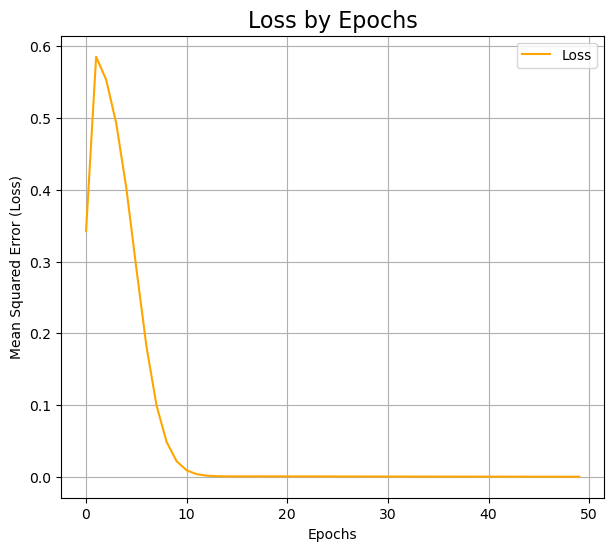

In [29]:
plt.figure(figsize=(7, 6))
plt.plot(range(epochs), losses, label="Loss", color='orange')
plt.title("Loss by Epochs", fontsize=16)
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (Loss)")
plt.grid(True)
plt.legend()

## Predictions and Real outputs figures

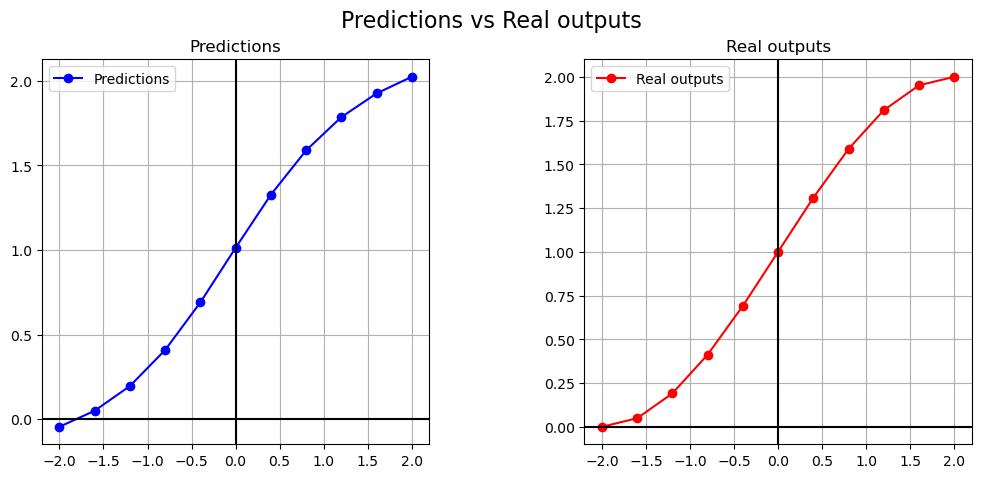

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].plot(inputs, predictions, marker='o', label="Predictions", color="blue")
axes[0].set_title('Predictions')
axes[0].axhline(y=0, color='black')
axes[0].axvline(x=0, color='black')
axes[0].grid(True, which='both')
axes[0].legend()

axes[1].plot(inputs, targets, marker='o', label="Real outputs", color="red")
axes[1].set_title('Real outputs')
axes[1].axhline(y=0, color='black')
axes[1].axvline(x=0, color='black')
axes[1].grid(True, which='both')
axes[1].legend()

fig.suptitle('Predictions vs Real outputs', fontsize=16)
fig.subplots_adjust(wspace=0.4)


## Convergence figure

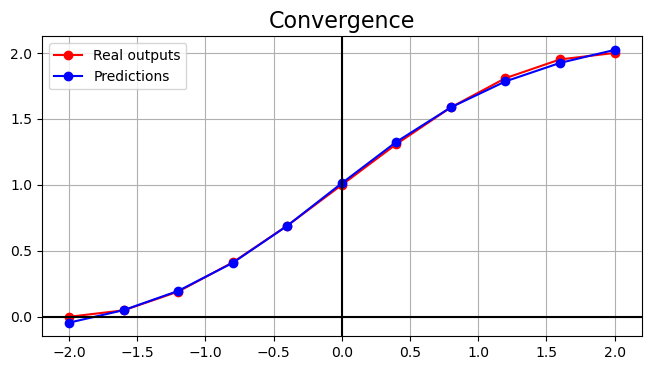

In [31]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_axes([0,0,1,1])
ax.plot(inputs, targets, marker='o', label="Real outputs", color="red")
ax.plot(inputs, predictions, marker='o', label="Predictions", color='blue')
ax.axhline(y=0, color='black')
ax.axvline(x=0, color='black')
plt.title("Convergence", fontsize=16)
plt.grid(True)
plt.legend()